In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=True)

In [3]:
df.shape

(60241, 35)

In [ ]:
# (71807, 35)

In [5]:
df

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2,2.0,3.0,2107.0,6037,0.0,0.342226,-1.186174,9158,1.0,...,1.227188,0.210239,0.2,0.5,118.488372,0.4,40.891461,0.3,0.666667,1
10711877,2,2.0,4.0,1882.0,6037,0.0,0.342203,-1.186164,9035,1.0,...,1.230895,0.207415,0.2,0.4,134.431456,0.4,45.047039,0.3,0.500000,1
10711888,2,2.0,4.0,1882.0,6037,0.0,0.342225,-1.186169,9800,0.0,...,1.229132,0.224977,0.2,0.4,136.870882,0.4,29.115510,0.3,0.500000,1
10711910,2,2.0,3.0,1477.0,6037,0.0,0.342219,-1.186157,11285,1.0,...,1.430790,0.259068,0.3,0.3,39.247123,0.1,1.777847,0.1,0.666667,1
10711923,2,2.0,4.0,1918.0,6037,0.0,0.342206,-1.186153,11239,1.0,...,1.261220,0.258012,0.3,0.4,87.522941,0.3,22.029540,0.3,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167636859,2,3.0,3.0,1850.0,6037,0.0,0.338716,-1.183562,6504,0.0,...,1.190191,0.149311,0.1,0.4,193.610811,0.5,44.830720,0.3,1.000000,0
167637040,2,4.0,4.0,2612.0,6037,0.0,0.338674,-1.183652,23641,0.0,...,1.155421,0.542723,0.4,0.6,225.010720,0.6,25.062349,0.3,1.000000,0
167638003,2,3.0,3.0,2108.0,6037,0.0,0.341261,-1.182262,6464,0.0,...,1.214827,0.148393,0.1,0.5,144.003321,0.4,62.824876,0.4,1.000000,0


In [8]:
list(df.columns)

['heating_system_type_id',
 'bathrooms',
 'bedrooms',
 'prop_sqft',
 'fips',
 'fireplace_cnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'pool_cnt',
 'region_id_city',
 'year_built',
 'fireplace_flag',
 'struct_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'heating_system_desc',
 'la_cnty',
 'orange_cnty',
 'ventura_cnty',
 'log_error_class',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cola']

In [10]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [11]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [23]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty', 'cola']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', 'heating_system_desc', 'region_id_city', 'acres_bin', 'sqft_bin', 'structure_dollar_sqft_bin']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'lot_sqft', 'year_built', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'structure_dollar_per_sqft', 'bath_bed_ratio']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

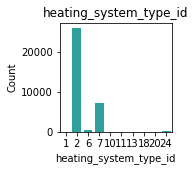

    heating_system_type_id  Count  Percent
2                        2  25863    76.67
7                        7   7132    21.14
6                        6    387     1.15
24                      24    255     0.76
20                      20     55     0.16
13                      13     24     0.07
18                      18      8     0.02
1                        1      7     0.02
10                      11      2     0.01
11                      10      1     0.00
_________________________________________________________________


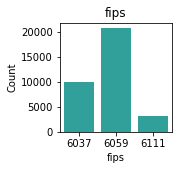

      fips  Count  Percent
6037  6059  20727    61.44
6059  6037   9897    29.34
6111  6111   3110     9.22
_________________________________________________________________


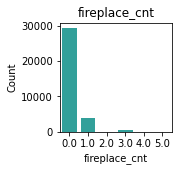

     fireplace_cnt  Count  Percent
0.0            0.0  29245    86.69
1.0            1.0   3898    11.56
2.0            3.0    494     1.46
3.0            2.0     91     0.27
4.0            5.0      5     0.01
5.0            4.0      1     0.00
_________________________________________________________________


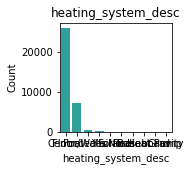

           heating_system_desc  Count  Percent
Central                Central  25863    76.67
Floor/Wall          Floor/Wall   7132    21.14
Forced air          Forced air    387     1.15
Yes                        Yes    255     0.76
Solar                    Solar     55     0.16
None                      None     24     0.07
Radiant                Radiant      8     0.02
Baseboard            Baseboard      7     0.02
Gravity              Heat Pump      2     0.01
Heat Pump              Gravity      1     0.00
_________________________________________________________________


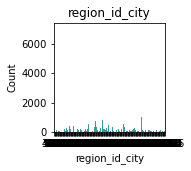

       region_id_city  Count  Percent
12447           37086   7077    20.98
46298           26964   1110     3.29
5534            52650    984     2.92
52650           30908    833     2.47
40227           12447    787     2.33
...               ...    ...      ...
53162           35216      1     0.00
6822            13232      1     0.00
40410           40410      1     0.00
38334           38334      1     0.00
10815            6822      1     0.00

[182 rows x 3 columns]
_________________________________________________________________


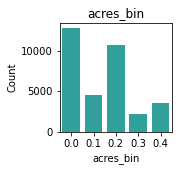

     acres_bin  Count  Percent
0.2        0.0  12748    37.79
0.1        0.2  10643    31.55
0.3        0.1   4571    13.55
0.0        0.4   3511    10.41
0.4        0.3   2261     6.70
_________________________________________________________________


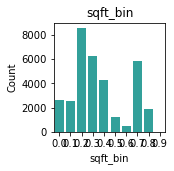

     sqft_bin  Count  Percent
0.4       0.2   8556    25.36
0.3       0.3   6288    18.64
0.2       0.7   5862    17.38
0.5       0.4   4307    12.77
0.1       0.0   2625     7.78
0.6       0.1   2526     7.49
0.7       0.8   1880     5.57
0.0       0.5   1219     3.61
0.8       0.6    468     1.39
0.9       0.9      3     0.01
_________________________________________________________________


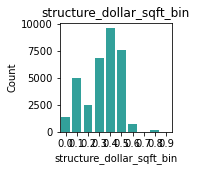

     structure_dollar_sqft_bin  Count  Percent
0.4                        0.4   9553    28.32
0.3                        0.5   7549    22.38
0.2                        0.3   6800    20.16
0.1                        0.1   4977    14.75
0.5                        0.2   2503     7.42
0.0                        0.0   1416     4.20
0.6                        0.6    760     2.25
0.7                        0.8    158     0.47
0.8                        0.7     17     0.05
0.9                        0.9      1     0.00
_________________________________________________________________


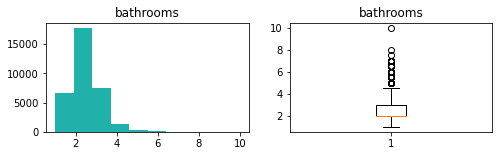

count    33734.000000
mean         2.212175
std          0.846383
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


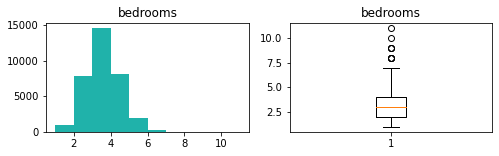

count    33734.000000
mean         3.090206
std          0.948383
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


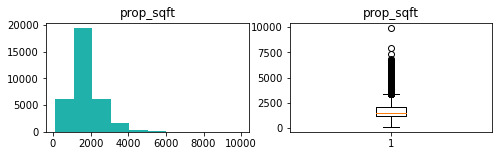

count    33734.000000
mean      1726.579089
std        757.854572
min        128.000000
25%       1204.000000
50%       1541.000000
75%       2069.000000
max       9918.000000
Name: prop_sqft, dtype: float64


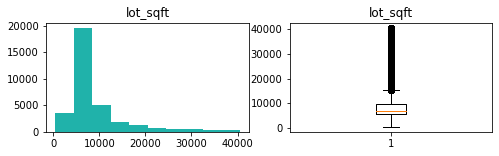

count    33734.000000
mean      9145.195263
std       6783.152272
min        435.000000
25%       5651.000000
50%       7011.000000
75%       9600.000000
max      40488.000000
Name: lot_sqft, dtype: float64


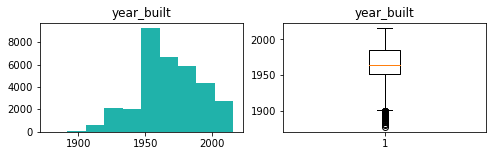

count    33734.000000
mean      1967.245420
std         23.427022
min       1878.000000
25%       1952.000000
50%       1965.000000
75%       1986.000000
max       2016.000000
Name: year_built, dtype: float64


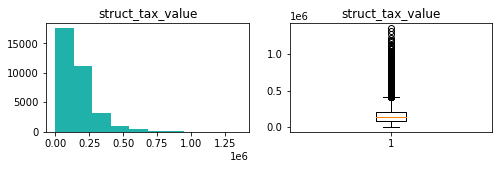

count    3.373400e+04
mean     1.643714e+05
std      1.269579e+05
min      1.290000e+02
25%      7.998000e+04
50%      1.310995e+05
75%      2.101535e+05
max      1.359419e+06
Name: struct_tax_value, dtype: float64


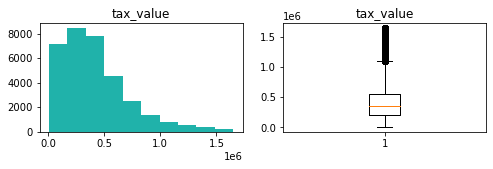

count    3.373400e+04
mean     4.213051e+05
std      3.031232e+05
min      9.242000e+03
25%      1.995482e+05
50%      3.623555e+05
75%      5.590000e+05
max      1.650432e+06
Name: tax_value, dtype: float64


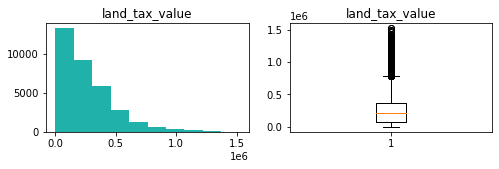

count    3.373400e+04
mean     2.569337e+05
std      2.223007e+05
min      1.217000e+03
25%      8.092200e+04
50%      2.080000e+05
75%      3.637230e+05
max      1.522954e+06
Name: land_tax_value, dtype: float64


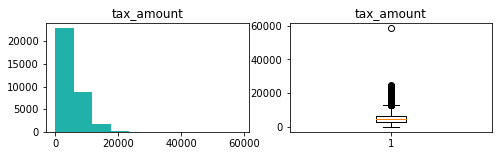

count    33734.000000
mean      5185.569332
std       3565.433491
min         61.820000
25%       2646.430000
50%       4460.020000
75%       6724.242500
max      58634.770000
Name: tax_amount, dtype: float64


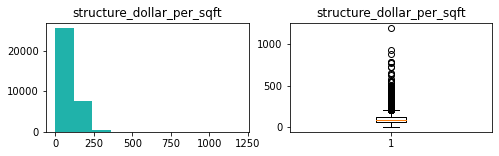

count    33734.000000
mean        92.636574
std         51.483606
min          0.158281
25%         58.651434
50%         86.802487
75%        118.264908
max       1196.277186
Name: structure_dollar_per_sqft, dtype: float64


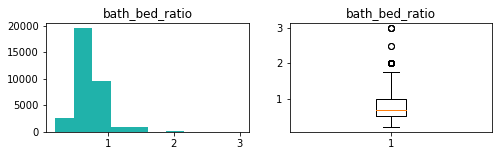

count    33734.000000
mean         0.742779
std          0.267338
min          0.200000
25%          0.500000
50%          0.666667
75%          1.000000
max          3.000000
Name: bath_bed_ratio, dtype: float64


In [24]:
ex.explore_univariate(train, categorical_vars, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=88026078.0, pvalue=8.06452046898512e-11)
        chi2       p-value  degrees of freedom
0  58.046299  1.536495e-12                   3

expected:
              0            1            2            3
0  6936.906385  6964.824806  6927.052825  6871.215984
1  1511.093615  1517.175194  1508.947175  1496.784016


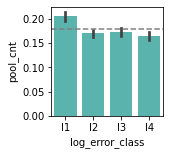


_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=64533968.0, pvalue=0.06856529605271579)
        chi2       p-value  degrees of freedom
0  52.783849  2.038586e-11                   3

expected:
              0            1            2            3
0  7323.820478  7353.296081  7313.417324  7254.466117
1  1124.179522  1128.703919  1122.582676  1113.533883


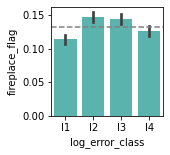


_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=137815441.0, pvalue=0.0005283068124397378)
         chi2       p-value  degrees of freedom
0  299.133011  1.532529e-64                   3

expected:
              0            1            2            3
0  3257.340843  3270.450406  3252.713938  3226.494812
1  5190.659157  5211.549594  5183.286062  5141.505188


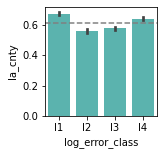


_____________________

orange_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=115520956.0, pvalue=0.002773661227452026)
         chi2       p-value  degrees of freedom
0  233.347795  2.611929e-50                   3

expected:
              0            1            2            3
0  5969.495939  5993.520899  5961.016541  5912.966621
1  2478.504061  2488.479101  2474.983459  2455.033379


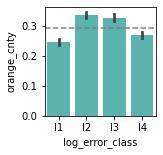


_____________________

ventura_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=47039362.0, pvalue=0.26154323340348473)
        chi2   p-value  degrees of freedom
0  29.013746  0.000002                   3

expected:
              0            1           2            3
0  7669.163218  7700.028695  7658.26952  7596.538566
1   778.836782   781.971305   777.73048   771.461434


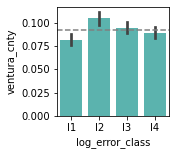


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=96358088.5, pvalue=0.005260118291733388)
         chi2       p-value  degrees of freedom
0  356.361057  6.255737e-77                   3

expected:
              0            1            2            3
0  6675.708069  6702.575265  6666.225529  6612.491137
1  1772.291931  1779.424735  1769.774471  1755.508863


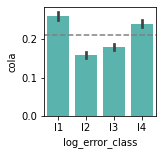


_____________________

bathrooms 
____________________



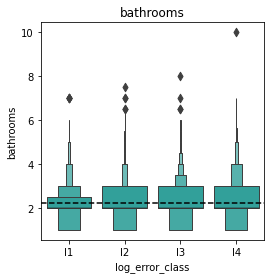

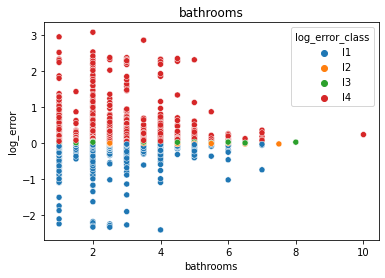

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean                2.103693     2.221882     2.265469     2.258126
std                 0.832530     0.788314     0.812267     0.936169
min                 1.000000     1.000000     1.000000     1.000000
25%                 2.000000     2.000000     2.000000     2.000000
50%                 2.000000     2.000000     2.000000     2.000000
75%                 2.500000     3.000000     3.000000     3.000000
max                 7.000000     7.500000     8.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06003384035178396, pvalue=2.5660912226217416e-28)

____________________

bedrooms 
____________________



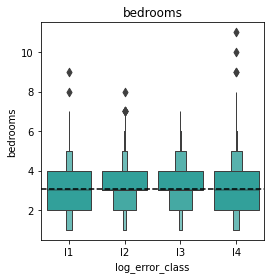

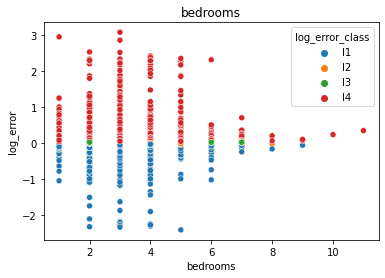

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean                2.987098     3.103278     3.134661     3.136233
std                 0.918071     0.909379     0.935693     1.019512
min                 1.000000     1.000000     1.000000     1.000000
25%                 2.000000     3.000000     3.000000     2.000000
50%                 3.000000     3.000000     3.000000     3.000000
75%                 4.000000     4.000000     4.000000     4.000000
max                 9.000000     8.000000     7.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.053004606117902434, pvalue=2.000851247284661e-22)

____________________

prop_sqft 
____________________



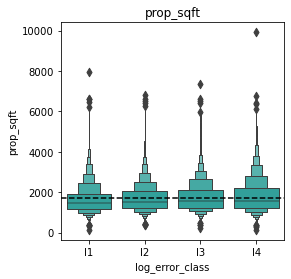

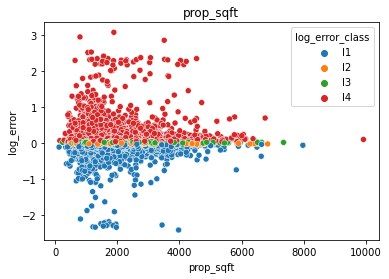

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean             1641.974313  1705.331290  1753.599218  1806.290272
std               718.933043   709.116226   736.285205   850.155084
min               128.000000   388.000000   240.000000   152.000000
25%              1154.000000  1213.000000  1236.000000  1218.000000
50%              1471.000000  1540.000000  1574.000000  1585.000000
75%              1933.000000  2039.750000  2105.250000  2195.250000
max              7970.000000  6837.000000  7348.000000  9918.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06957184031286007, pvalue=1.7903795800087933e-37)

____________________

lot_sqft 
____________________



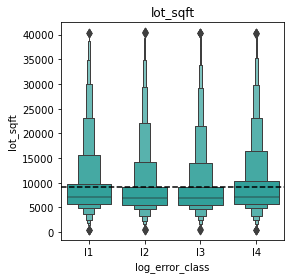

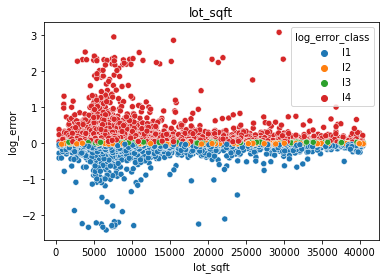

log_error_class            l1            l2            l3            l4
count             8448.000000   8482.000000   8436.000000   8368.000000
mean              9314.511482   8929.943292   8871.704718   9468.157744
std               6880.845365   6678.139889   6576.254508   6974.505111
min                435.000000    435.000000    435.000000    435.000000
25%               5778.000000   5555.500000   5544.750000   5726.500000
50%               7086.000000   6967.500000   6914.500000   7179.000000
75%               9740.500000   9231.750000   9239.000000  10320.750000
max              40449.000000  40488.000000  40453.000000  40397.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.001249147064979182, pvalue=0.8185423726301122)

____________________

year_built 
____________________



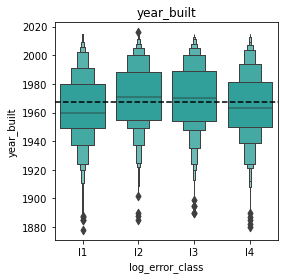

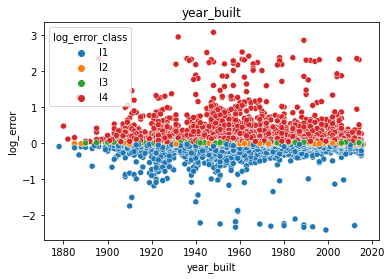

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean             1962.806581  1970.945768  1970.587719  1964.606477
std                23.591071    22.465278    22.789831    23.741494
min              1878.000000  1885.000000  1890.000000  1880.000000
25%              1949.000000  1955.000000  1954.000000  1950.000000
50%              1960.000000  1971.000000  1970.000000  1963.000000
75%              1980.000000  1988.000000  1989.000000  1981.000000
max              2015.000000  2016.000000  2015.000000  2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02865744597630961, pvalue=1.406885233017362e-07)

____________________

struct_tax_value 
____________________



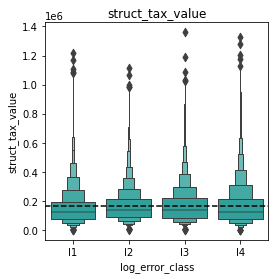

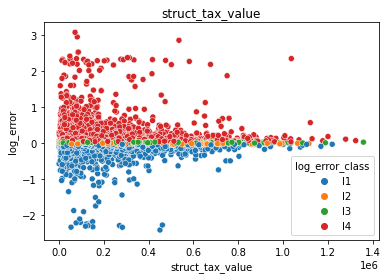

log_error_class            l1            l2            l3            l4
count            8.448000e+03  8.482000e+03  8.436000e+03  8.368000e+03
mean             1.551111e+05  1.653205e+05  1.701685e+05  1.669138e+05
std              1.221389e+05  1.169886e+05  1.250482e+05  1.419802e+05
min              1.290000e+02  8.960000e+02  1.015000e+03  1.480000e+02
25%              7.464325e+04  8.662150e+04  8.531550e+04  7.308225e+04
50%              1.230790e+05  1.357490e+05  1.386860e+05  1.266040e+05
75%              1.953125e+05  2.117770e+05  2.176892e+05  2.132268e+05
max              1.220000e+06  1.116030e+06  1.359419e+06  1.324844e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.014316899328776223, pvalue=0.008548635431589579)

____________________

tax_value 
____________________



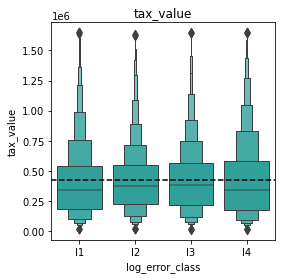

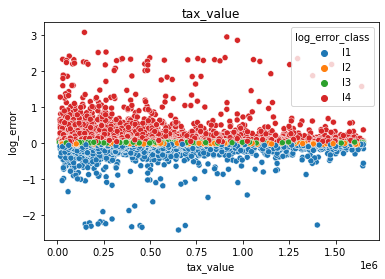

log_error_class            l1            l2            l3            l4
count            8.448000e+03  8.482000e+03  8.436000e+03  8.368000e+03
mean             4.092591e+05  4.213606e+05  4.286211e+05  4.260345e+05
std              3.098303e+05  2.769985e+05  2.890870e+05  3.335945e+05
min              1.361600e+04  1.352400e+04  1.050400e+04  9.242000e+03
25%              1.843020e+05  2.235462e+05  2.203045e+05  1.763942e+05
50%              3.400305e+05  3.787625e+05  3.791705e+05  3.433555e+05
75%              5.380915e+05  5.519322e+05  5.670020e+05  5.788368e+05
max              1.650000e+06  1.635108e+06  1.650432e+06  1.650000e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.006808052262092299, pvalue=0.21115685425863098)

____________________

land_tax_value 
____________________



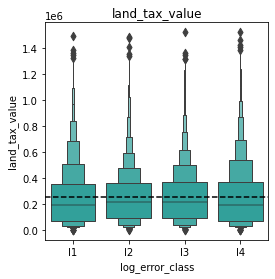

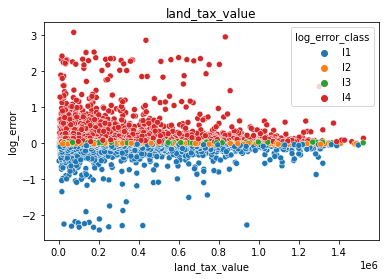

log_error_class            l1            l2            l3            l4
count            8.448000e+03  8.482000e+03  8.436000e+03  8.368000e+03
mean             2.541480e+05  2.560400e+05  2.584525e+05  2.591207e+05
std              2.316673e+05  2.052323e+05  2.110357e+05  2.396764e+05
min              1.217000e+03  4.912000e+03  3.906000e+03  4.103000e+03
25%              7.202750e+04  9.414750e+04  9.047725e+04  6.872400e+04
50%              1.954355e+05  2.201730e+05  2.164510e+05  1.947345e+05
75%              3.563265e+05  3.597665e+05  3.680000e+05  3.716598e+05
max              1.497690e+06  1.488992e+06  1.521834e+06  1.522954e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0016266681676855902, pvalue=0.7651259910572674)

____________________

tax_amount 
____________________



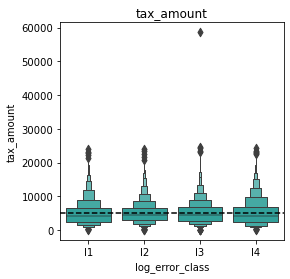

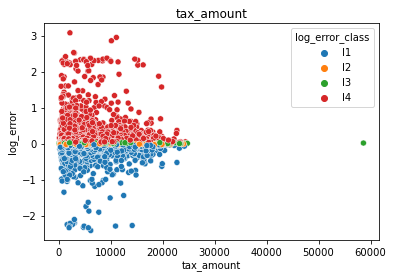

log_error_class            l1            l2            l3            l4
count             8448.000000   8482.000000   8436.000000   8368.000000
mean              5045.553938   5192.084428   5279.464849   5225.660919
std               3610.909508   3261.114627   3458.351552   3901.416924
min                202.120000     85.940000     61.820000    129.220000
25%               2500.460000   2930.595000   2847.305000   2336.037500
50%               4216.940000   4626.740000   4657.190000   4262.630000
75%               6457.492500   6646.395000   6843.252500   6930.935000
max              24177.780000  24010.060000  58634.770000  24366.440000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.004931677995239426, pvalue=0.3650606416688865)

____________________

structure_dollar_per_sqft 
____________________



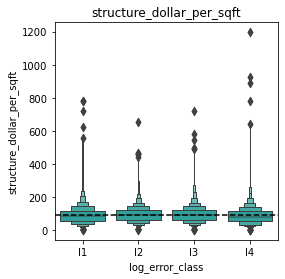

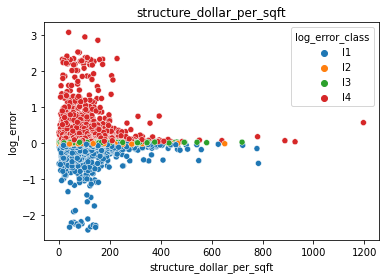

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean               92.311560    95.127818    94.645558    88.414201
std                54.529608    47.456912    49.478726    53.899015
min                 0.352459     1.145780     0.332569     0.158281
25%                56.165893    63.076676    61.843740    52.815591
50%                85.595620    90.218506    89.520772    81.340971
75%               118.022804   120.662774   120.075522   114.106533
max               783.568182   651.202473   719.269312  1196.277186 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.031797359366734716, pvalue=5.175659830377652e-09)

____________________

bath_bed_ratio 
____________________



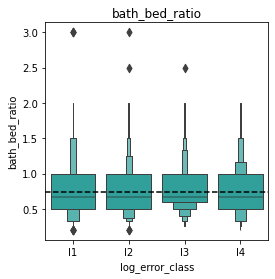

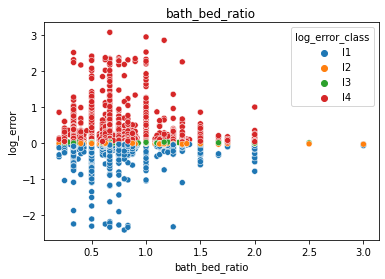

log_error_class           l1           l2           l3           l4
count            8448.000000  8482.000000  8436.000000  8368.000000
mean                0.731526     0.743978     0.750158     0.745484
std                 0.276989     0.259703     0.256905     0.274941
min                 0.200000     0.200000     0.250000     0.200000
25%                 0.500000     0.500000     0.600000     0.500000
50%                 0.666667     0.666667     0.666667     0.666667
75%                 1.000000     1.000000     1.000000     1.000000
max                 3.000000     3.000000     2.500000     2.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.020312553555710745, pvalue=0.00019070882174450105)

____________________



In [25]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

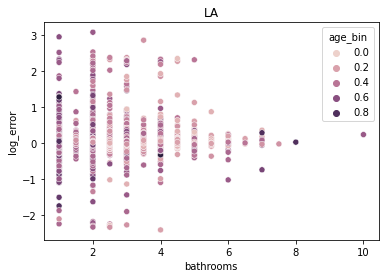

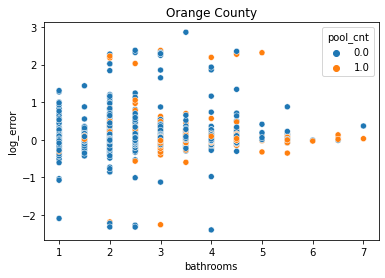

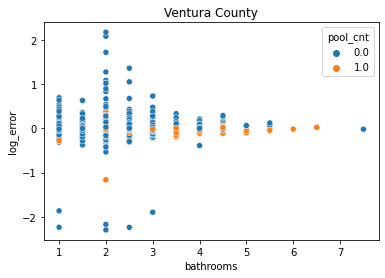

In [22]:
sns.scatterplot(data=train, y=continuous_target, x='bathrooms', hue='age_bin')
plt.title('LA')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title('Ventura County')
plt.show()